# Проект "Анализ критериев, определяющих популярность компьютерных игр"

В данном проекте будут изучены данные о компьютерных играх (название игры, жанр, год выпуска, игровая платформа) с целью выявления критериев популярности тех или иных игр. Мы имеем данные о продаже игр в 3-х основных региона Северная Америка, Европа и Япония в период с 1980 по 2016 гг. Это позволит спланировать рекламную кампания и бюджет на 2017 год. Данные за 2016 г. неполные, поэтому их не стоит учитывать в анализе.

<a id="ogl"></a>
## Оглавление

* [Оглавление](#ogl)
* [Изучение общей информации в файле](#setup)
* [Предобработка данных](#analisys_data)
    * [Переименование столбцов](#analisys_data1)
    * [Изменение типов данных](#analisys_data2)
    * [Удаление пропусков](#analisys_data3)
* [Исследовательский анализ данных](#develop_data)
    * [Проверка количества выпускаемых игр по годам](#develop_data1)
    * [Анализ продаж игр в зависимости от игровой платформы](#develop_data2)
    * [Выбор актуального периода](#develop_data3)
    * [Лидеры по продажам](#develop_data4)
    * [«Ящик с усами» по глобальным продажам игр на каждой платформе для актуального периода](#develop_data5)
    * [Влияние отзывов на продажи](#develop_data6)
        * [Изучение влияния оценки пользователей на продажи игр по 3-м лидерам продаж](#develop_data7)
        * [Изучение влияния оценки критиков на продажи игр по 3-м лидерам продаж](#develop_data8)
        * [Изучение влияния оценки пользователей и критиков на продажи игр по всем платформам](#develop_data9)
        * [Анализ того, как жанр игры влияет на продажи игр](#develop_data10)
* [Определение портрета игрока](#player)
    * [Самые популярные платформы в зависимости от региона](#player1)
    * [Самые популярные жанры в зависимости от региона](#player2)
    * [Влияние рейтинга ESRB на продажи в отдельном регионе](#player3)
* [Проверка гипотез](#check_hypot)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#check_hypot1)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#check_hypot2)
* [Заключение](#vivod)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

<a id="setup"></a>
## Изучение общей информации в файле

In [2]:
df_games = pd.read_csv('D:/Datasets/4. Сборный проект 1/games.csv')

In [3]:
df_games.info() # основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выводы:
 - Тип данных в колонке Year_of_Release необходимо поменять на Int64
 - Названия столбцов необходимо привести к нижнему регистру

In [4]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы имеем ледующие данные:
 -	Name — название игры
 - 	Platform — платформа
 -	Year_of_Release — год выпуска
 -	Genre — жанр игры
 -	NA_sales — продажи в Северной Америке (миллионы проданных копий)
 -	EU_sales — продажи в Европе (миллионы проданных копий)
 -	JP_sales — продажи в Японии (миллионы проданных копий)
 -	Other_sales — продажи в других странах (миллионы проданных копий)
 -	Critic_Score — оценка критиков (максимум 100)
 -	User_Score — оценка пользователей (максимум 10)
 -	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
В таблице 16715 строк. В 6 колонках имеются пропуски данныех.
Названия колонок имеют нарушение стилей, далее это будет исправлено.
Часть колонок имеет неверный тип данных.

<a id="analisys_data"></a>
## Предобработка данных

<a id="analisys_data1"></a>
### Переименование столбцов

In [5]:
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df_games = df_games.rename(columns={
    'Name': 'name', 
    'Platform': 'platform', 
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})

In [7]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id="analisys_data2"></a>
### Изменение типов данных

В колонке **user_score** тип данных - object. Изменим его на float64.

In [8]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce').astype('float64')

In [9]:
df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [10]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce').astype('float64')

При этом все текстовые значения заменятся на пропуски, включая 'tbd'. tbd скорее всего означает to be determined. То есть оценка игры не определена, а значит можно оставить пропуск. Заполнять каким-то значением будет некорректно.

In [11]:
df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [12]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Тип данных в столбцах **year_of_release** и **user_score** изменены на int64 и float64 соответственно.

<a id="analisys_data3"></a>
### Удаление пропусков

In [13]:
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

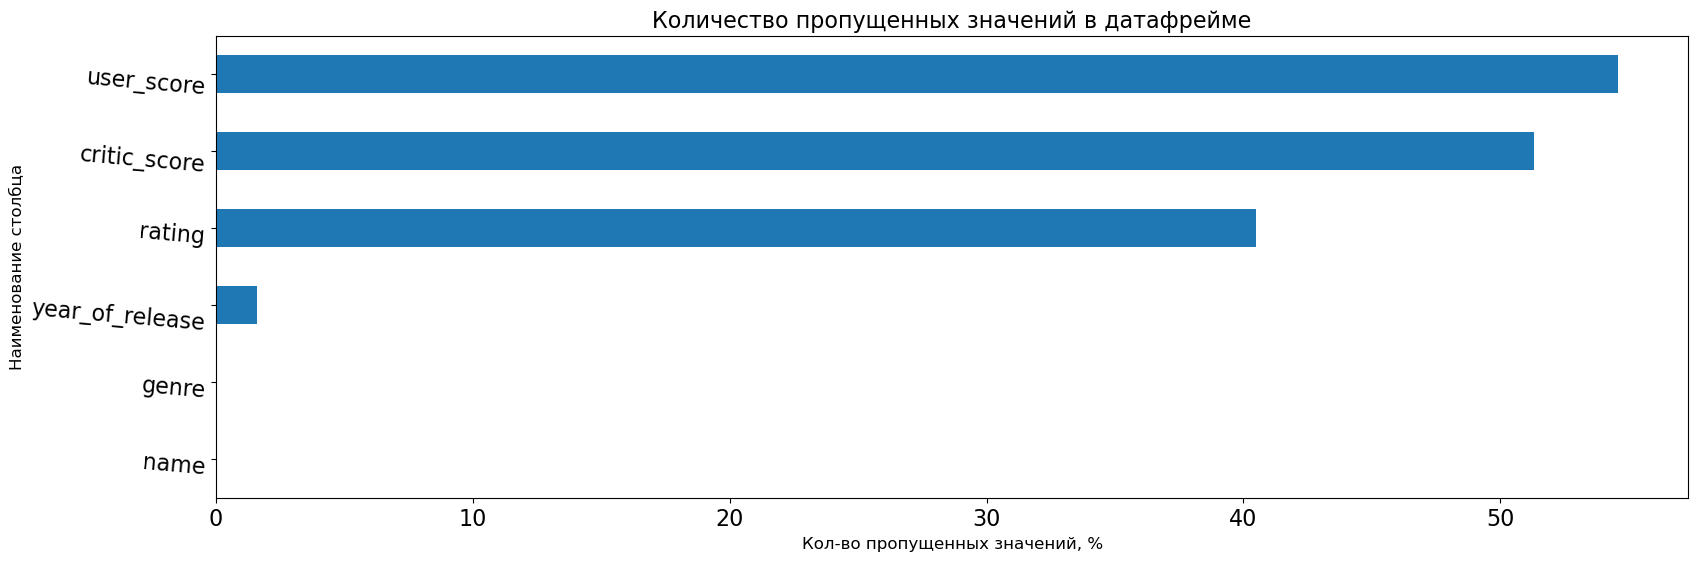

In [14]:
pass_value_barh(df_games)
plt.xlabel("Кол-во пропущенных значений, %", fontsize = 12);
plt.ylabel("Наименование столбца", fontsize = 12);
plt.title("Количество пропущенных значений в датафрейме", fontsize = 16);

Смотрим какое количество пропусков мы имеем в каждом столбце.

In [15]:
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Удалим строки с пустыми значениями в столбцах **name**, **year_of_release** и **genre**, так как их довольно мало и они будут мешать анализу.

In [16]:
df_games['total_sales'] = df_games[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [17]:
name_nan = df_games[df_games['name'].isna()]
a = name_nan['total_sales'].sum()
year_of_release_nan = df_games[df_games['year_of_release'].isna()]
b = year_of_release_nan['total_sales'].sum()
s = df_games['total_sales'].sum()

In [18]:
res = (a+b) / s * 100
print(res, '%')

1.1366453148431253 %


Строчки с пропущенными значениями в столбцах **name**, **year_of_release** и **genre** составляют лишь 1,13 % от общей суммы продаж. Эти строчки можно удалять.

In [19]:
# удаляем пропуски в столбцах
df_games = df_games.dropna(subset = ['name', 'year_of_release', 'genre'])
# поменяем тип данных в столбце year_of_release на int64
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').astype('int64')

Попробуем разобраться с пропусками в столбцах с оценками.

critic_score       8578

user_score         6701

rating             6766

In [20]:
# отсортируем строки с пропущенными значениями в столбце critic_score, так как их больше всего
critic_score_nan = df_games[df_games['critic_score'].isna()] 
critic_score_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


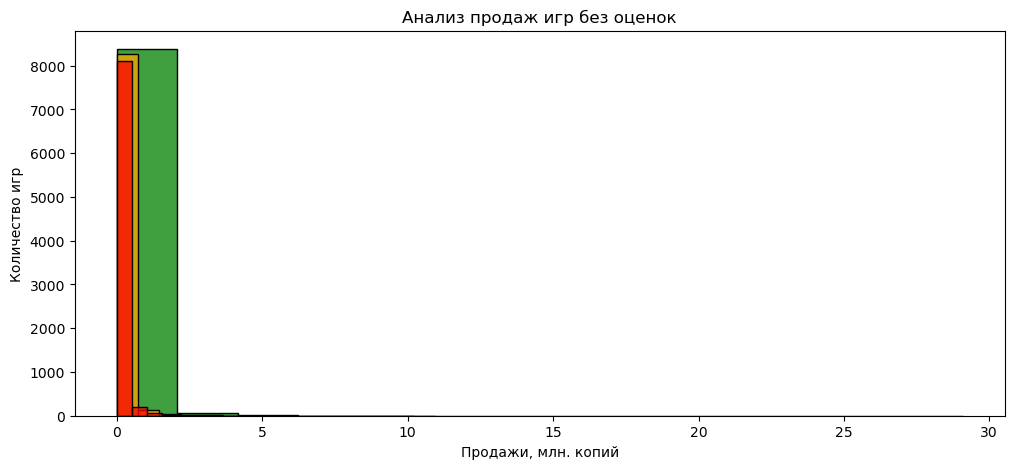

In [21]:
fig, axs = plt.subplots(figsize=(12, 5))

sns.histplot(data=critic_score_nan, x="na_sales", bins=14, color="green")
sns.histplot(data=critic_score_nan, x="eu_sales", bins=15, color="orange")
sns.histplot(data=critic_score_nan, x="jp_sales", bins=20, color="red")
plt.xlabel("Продажи, млн. копий")
plt.ylabel("Количество игр")
plt.title("Анализ продаж игр без оценок")
plt.show()

На графике выше видно, что большинство игр без оценки имели низкий уровень продаж по всем регионам.
В этом кроется причина отсутствия оценки скорее всего.

В столбцах с оценками критиков, пользователей и рейтингом от организации ESRB пропусков довольно много. Их не стоит удалять. Пропуски в этих столбцах могут быть потому, что не все критики и уж тем более пользователи ставят оценки играм. Я сам никогда не ставил оценки играм при подобных опросах.

Считаем сумму значений продаж из столбцов **na_sales**, **eu_sales**, **jp_sales**, **other_sales** для каждой строки

In [22]:
df_games['total_sales'] = df_games[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Вывод: проведена предобработка данных.

In [23]:
# check
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [24]:
df_games['rating'] = df_games['rating'].fillna("no_rating")

In [25]:
df_games.duplicated().sum()

0

In [26]:
df_games = df_games.drop_duplicates()

display(df_games[df_games.duplicated(['name', 'platform', 'year_of_release'])].count())
display(df_games[df_games.duplicated(['name', 'platform', 'year_of_release'])])
df_games = df_games.drop_duplicates(['name', 'platform', 'year_of_release'])
display(df_games[df_games.duplicated(['name', 'platform', 'year_of_release'])].count())

name               1
platform           1
year_of_release    1
genre              1
na_sales           1
eu_sales           1
jp_sales           1
other_sales        1
critic_score       1
user_score         1
rating             1
total_sales        1
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

<a id="develop_data"></a>
## Исследовательский анализ данных

<a id="develop_data1"></a>
### Проверка количества выпускаемых игр по годам

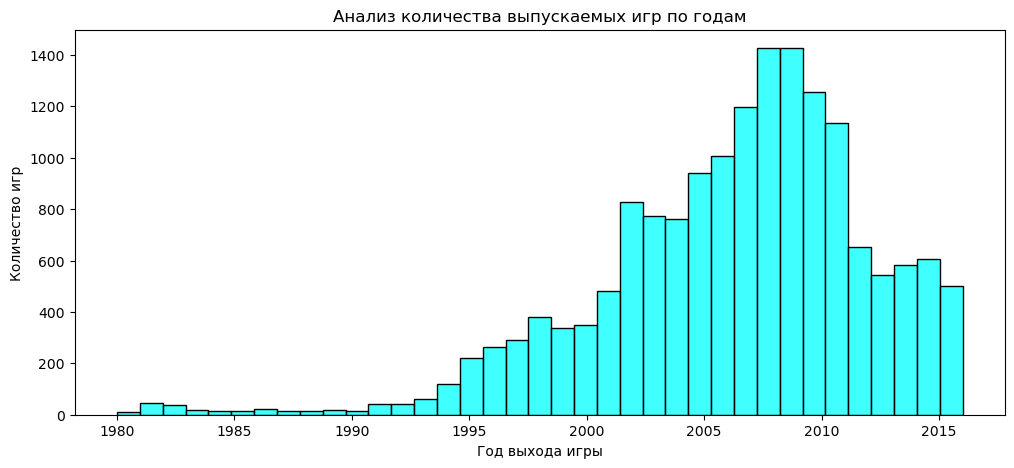

In [27]:
fig, axs = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_games, x="year_of_release", bins=37, color="cyan")
plt.xlabel("Год выхода игры")
plt.ylabel("Количество игр")
plt.title("Анализ количества выпускаемых игр по годам")
plt.show()

На графике видно, что до конца 90-х годов игр выпускалось мало. Поэтому этот период можно отбросить при дальнейшем анализе.

<a id="develop_data2"></a>
### Анализ продаж игр в зависимости от игровой платформы

In [28]:
platform_income = df_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_income.columns =['Суммарные продажи']
platform_income=platform_income.sort_values(by='Суммарные продажи')
platform_income

,Суммарные продажи
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


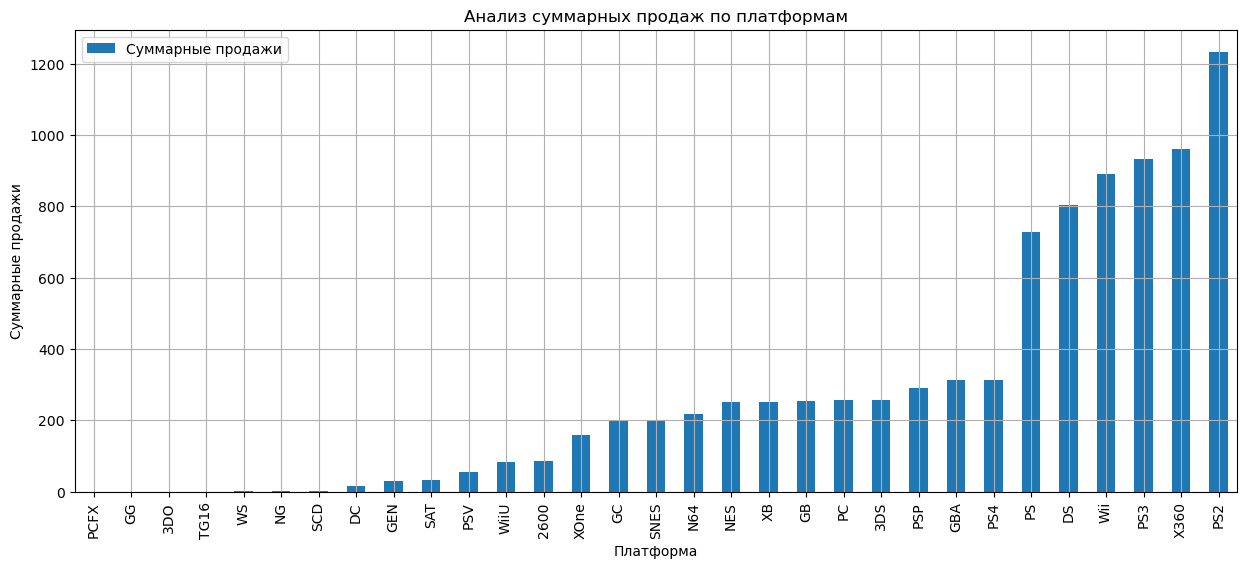

In [29]:
platform_income.plot.bar(y='Суммарные продажи',  grid=True, figsize=(15, 6))
plt.xlabel("Платформа")
plt.ylabel("Суммарные продажи")
plt.title("Анализ суммарных продаж по платформам");

Платформы с наибольшим числом продаж: PS, DS, Wii, PS3, X360, PS2.

In [30]:
# сделаем сводную таблицу по колонкам общие продажи и последний год выпуска игр
platform_income1 = df_games.pivot_table(index='platform', 
                                        values=['total_sales', 'year_of_release'], 
                                        aggfunc={'total_sales':'count', 'year_of_release':'max'}) 
# выделим только те игровые платформы, по которым игры выходили после 2007 года
platform_income1 = platform_income1.query('year_of_release > 2008') 
platform_income1

,total_sales,year_of_release
platform,,
3DS,512,2016
DS,2121,2013
PC,957,2016
PS2,2127,2011
PS3,1305,2016
PS4,392,2016
PSP,1193,2015
PSV,429,2016
Wii,1286,2016


Выделены платформы по продажам начиная с 2008 года.

In [31]:
top_sales = platform_income1.index.tolist()
top_sales

['3DS',
 'DS',
 'PC',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'Wii',
 'WiiU',
 'X360',
 'XOne']

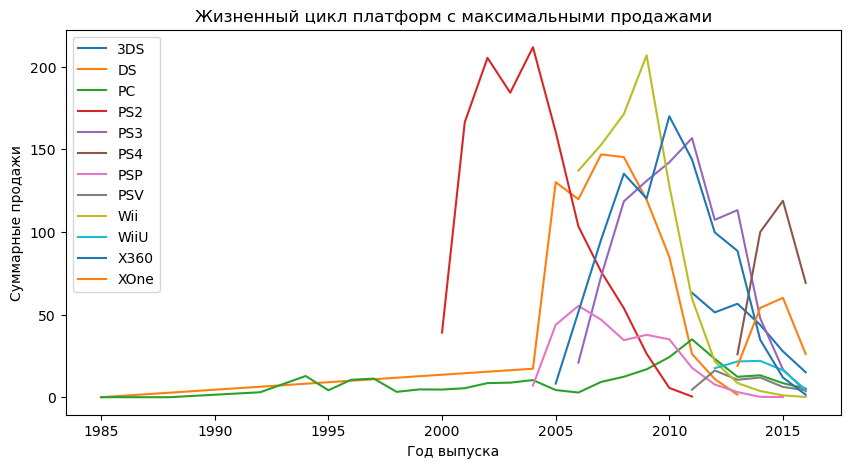

In [32]:
for name in top_sales:
    (
    df_games.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend()  

Есть два странных графика для платформ DS и PC. PC существует давно, а вот DS только с 2004 года. Похоже на ошибку.

In [33]:
display(df_games.query('platform == "DS" and year_of_release < 2004'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


Обнаруживаем ошибочную строку с индексом 15957. Ее можно удалить.

In [34]:
df_games.loc[15957]

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   1985
genre                                           Action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                       NaN
user_score                                         NaN
rating                                       no_rating
total_sales                                       0.02
Name: 15957, dtype: object

In [35]:
df_games.loc[15957,'year_of_release'] = 2010

In [36]:
# check
df_games.loc[15957]

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   2010
genre                                           Action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                       NaN
user_score                                         NaN
rating                                       no_rating
total_sales                                       0.02
Name: 15957, dtype: object

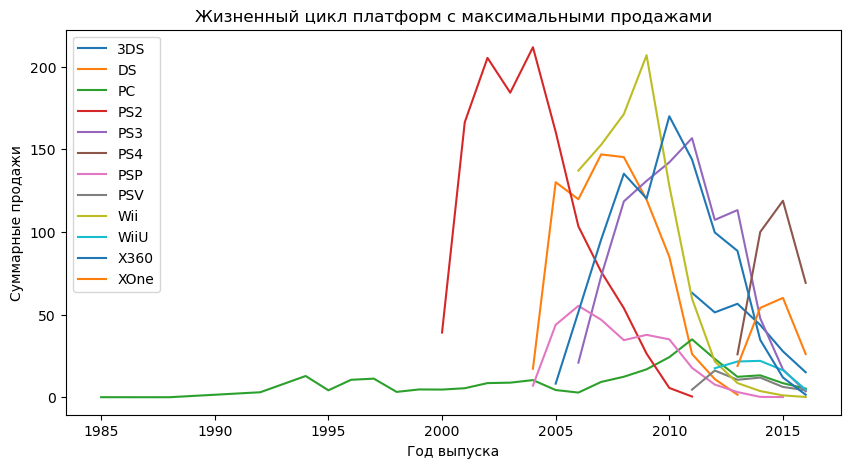

In [37]:
for name in top_sales:
    (
    df_games.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

Вычисляем жизненный цикл игровой платформы

In [38]:
life_cycle = df_games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
life_cycle['life'] = life_cycle['max'] - life_cycle['min']
print('Медианный жизненный цикл игровой платформы составляет:', life_cycle['life'].median(), 'лет')

Медианный жизненный цикл игровой платформы составляет: 6.0 лет


Вывод: в среднем игровая платформа живет 6 лет.

In [39]:
life_cycle

,platform,min,max,life
,,year_of_release,year_of_release,
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,2004,2013,9
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4


In [40]:
life_cycle.columns

MultiIndex([('platform',                ''),
            (     'min', 'year_of_release'),
            (     'max', 'year_of_release'),
            (    'life',                '')],
           )

In [41]:
# Убираем из выборки с жизненным циклом платформу PC и платформы сроком жизни не более 1 года
# зачем убирать новые платформы я не понял, ведь мы не знаем цикл жизни платформы на данному этапе
life_cycle_alt = life_cycle.loc[(life_cycle['platform'] != 'PC') & (life_cycle['life'] > 1)].reset_index(drop= True)
life_cycle_alt

,platform,min,max,life
,,year_of_release,year_of_release,
0,2600,1980,1989,9
1,3DS,2011,2016,5
2,DC,1998,2008,10
3,DS,2004,2013,9
4,GB,1988,2001,13
5,GBA,2000,2007,7
6,GC,2001,2007,6
7,GEN,1990,1994,4
8,N64,1996,2002,6


In [42]:
# check
(life_cycle_alt['max'] - life_cycle_alt['min']).median()

year_of_release    8.0
dtype: float64

Жизненный цикл платформы составляет 8 лет.

<a id="develop_data3"></a>
### Выбор актуального периода

In [43]:
t = (life_cycle_alt['max'] - life_cycle_alt['min']).median()
print('Актуальный период составляет последние', t, 'лет')

Актуальный период составляет последние year_of_release    8.0
dtype: float64 лет


<a id="develop_data4"></a>
### Лидеры по продажам

За актуальный период взят период с 2010 по 2016 гг.

In [44]:
actual_period = df_games.query('2014 <= year_of_release < 2016').reset_index(drop= True)
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Hanasaku Manimani,PSV,2014,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
1183,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
1184,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
1185,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


In [45]:
actual_sales = actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum')
actual_sales = actual_sales.sort_values(by='total_sales')
actual_sales

,total_sales
platform,
PSP,0.36
Wii,4.89
PSV,18.15
PC,21.80
WiiU,38.38
X360,46.70
PS3,64.58
3DS,71.54
XOne,114.21


In [46]:
actual_sales.tail(3)

,total_sales
platform,
3DS,71.54
XOne,114.21
PS4,218.90


В топе по продажам 3DS, XOne, PS4.

In [47]:
actual_sales1 = actual_sales.loc[actual_sales['total_sales'] > 20]
actual_sales1

,total_sales
platform,
PC,21.80
WiiU,38.38
X360,46.70
PS3,64.58
3DS,71.54
XOne,114.21
PS4,218.90


Вывод: Перспективными по продажам платформами являются: PC, WiiU, X360, PS3, 3DS, XOne, PS4.

In [48]:
good_sales = actual_sales1.index.tolist()

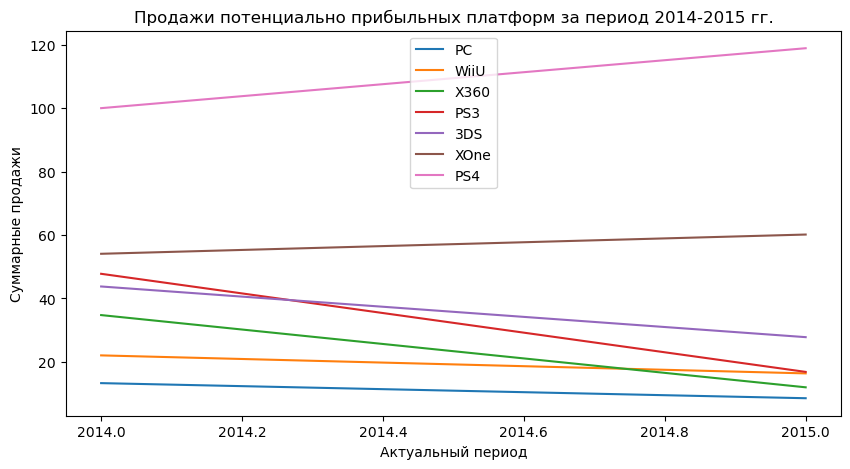

In [49]:
for name in good_sales:
    (
    actual_period.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Продажи потенциально прибыльных платформ за период 2014-2015 гг.')
    plt.xlabel('Актуальный период')
    plt.ylabel('Суммарные продажи')
    plt.legend()

Анализ периода 2014-2015 гг. показал, что потенциально прибыльными платформами на данный момент являются PS4 и XOne.

<a id="develop_data5"></a>
### «Ящик с усами» по глобальным продажам игр на каждой платформе для актуального периода

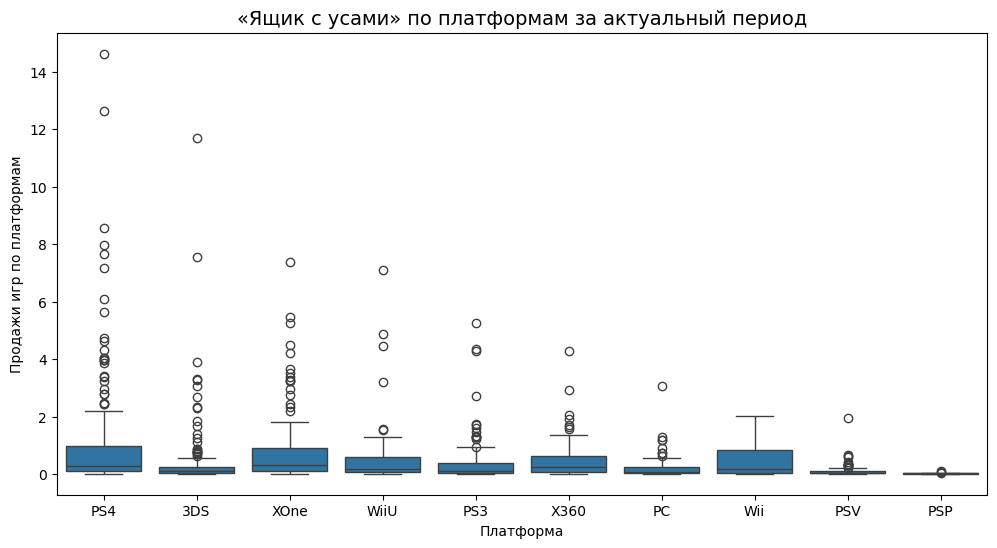

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(data=actual_period, x='platform', y='total_sales')
plt.title('«Ящик с усами» по платформам за актуальный период', fontsize=14)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Продажи игр по платформам',fontsize=10);

In [51]:
actual_period['total_sales'].describe()

count    1187.000000
mean        0.505063
std         1.167734
min         0.010000
25%         0.040000
50%         0.120000
75%         0.440000
max        14.630000
Name: total_sales, dtype: float64

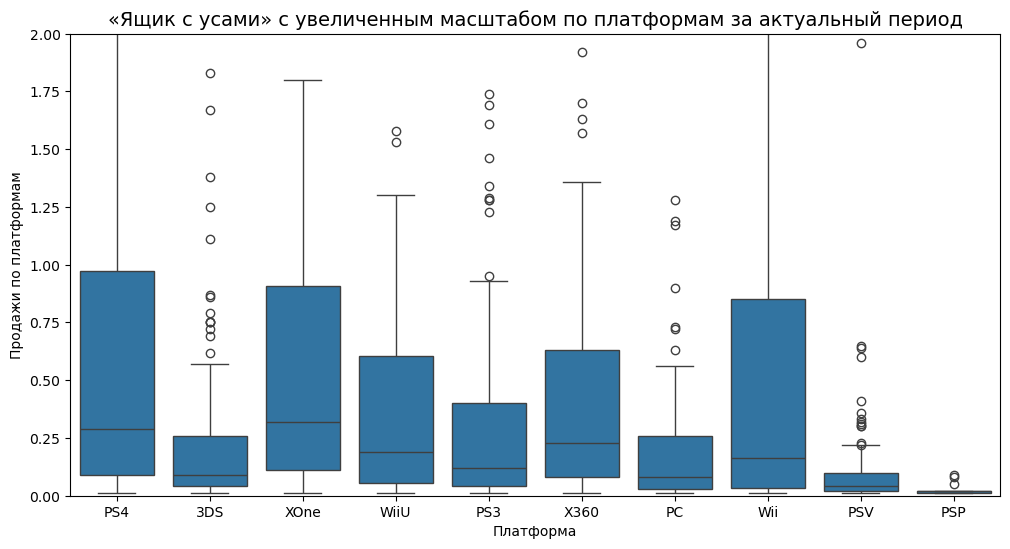

In [52]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_period, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('«Ящик с усами» с увеличенным масштабом по платформам за актуальный период', fontsize=14)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Продажи по платформам',fontsize=10);

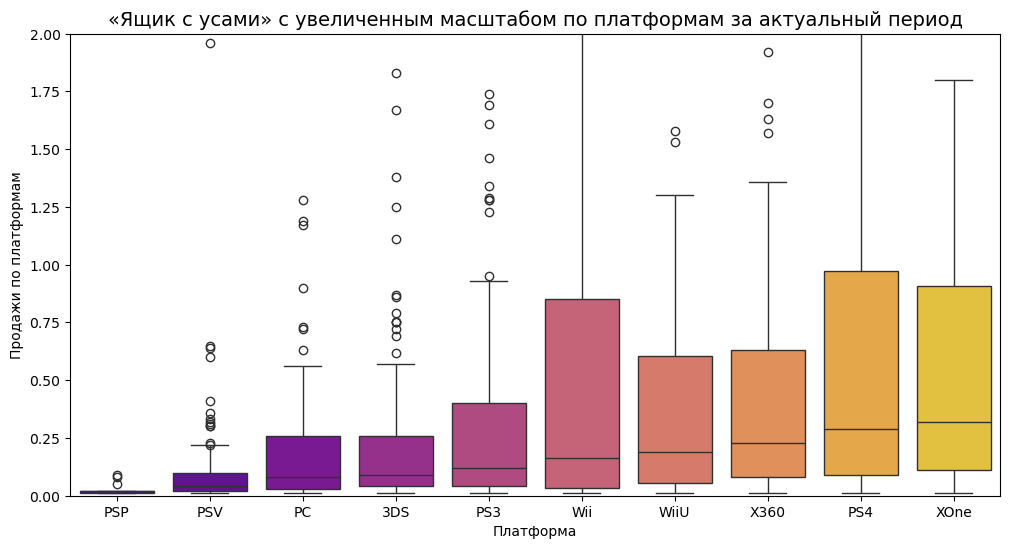

In [53]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_period, x='platform', y='total_sales', palette='plasma', 
                 order=actual_period.groupby('platform')['total_sales'].agg('median').sort_values(ascending=True).index)
ax.set(ylim=(0,2))
plt.title('«Ящик с усами» с увеличенным масштабом по платформам за актуальный период', fontsize=14)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Продажи по платформам',fontsize=10);

Вывод: 
 - медианное значение по выборке **actual_period** составляет 0.13;
 - по всем консолям присутствуют выбросы по продажам, данные выбросы не считаю целесообразным отбрасывать.

<a id="develop_data6"></a>
### Влияние отзывов на продажи

<a id="develop_data7"></a>
##### Изучение влияния оценки пользователей на продажи игр по 3-м лидерам продаж

In [54]:
top_3 = actual_sales.tail(3).index.tolist()
top_3

['3DS', 'XOne', 'PS4']

Коэффициент корреляции Пирсона между оценками пользователей и продажами по платформе 3DS  = 0.23461041305360802


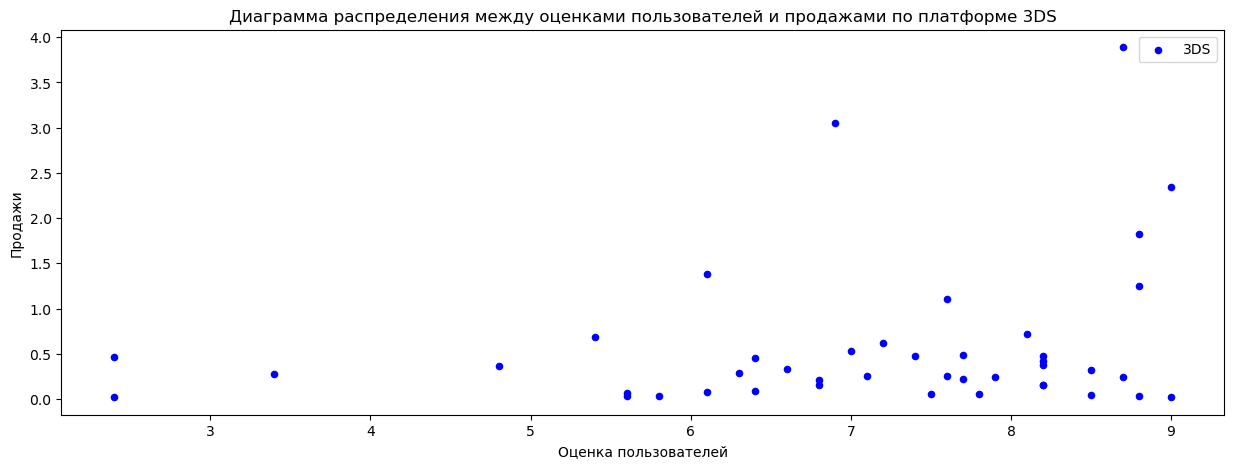

Коэффициент корреляции Пирсона между оценками пользователей и продажами по платформе XOne  = -0.056545980194161016


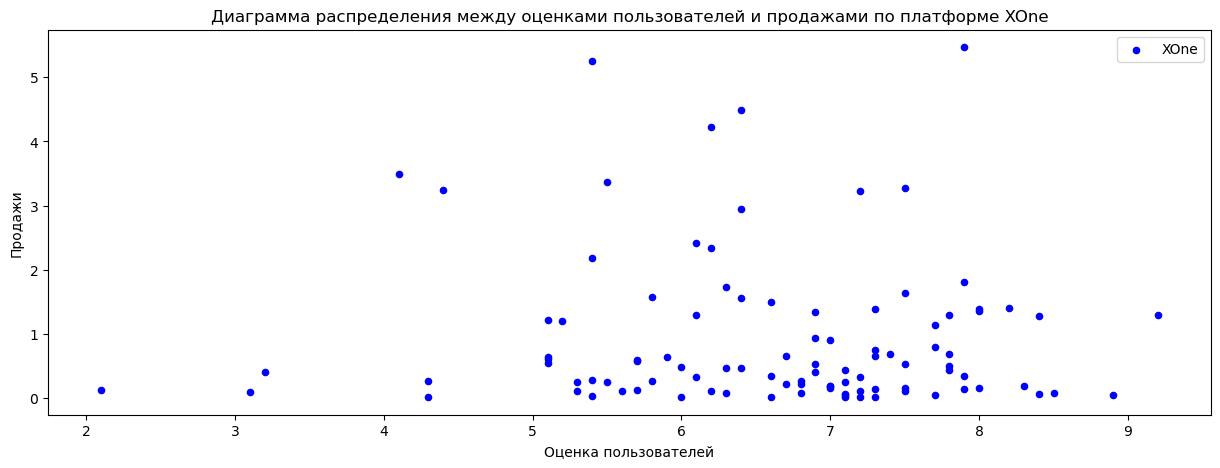

Коэффициент корреляции Пирсона между оценками пользователей и продажами по платформе PS4  = 0.005328260777115949


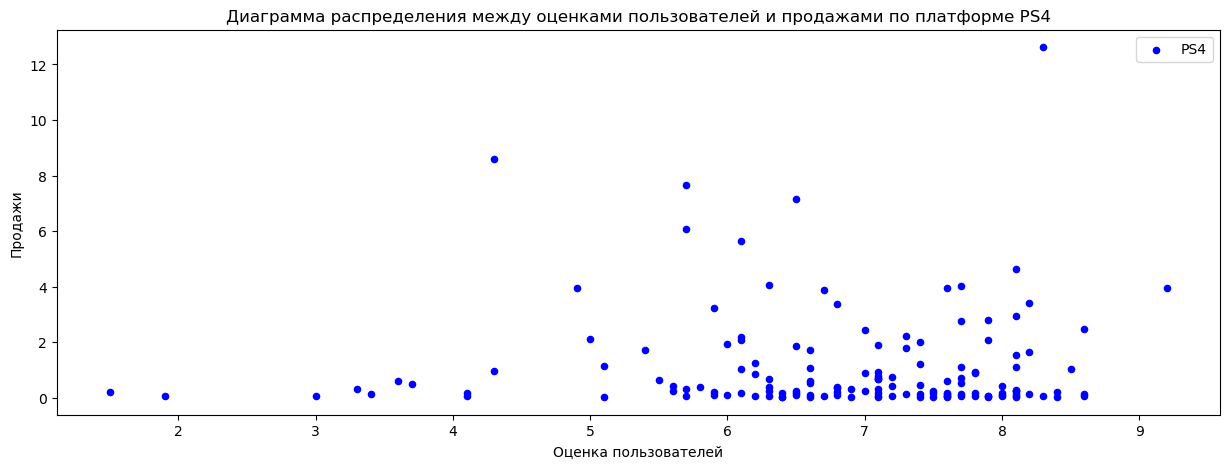

In [55]:
for name in top_3:
    (
    actual_period
        .query('platform == @name')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 5), 
          color='blue')
    )
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {name}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Коэффициент корреляции Пирсона между оценками пользователей и продажами по платформе {name}  =', 
          actual_period.query('platform == @name')['user_score'].corr(actual_period.query('platform == @name')['total_sales']))
    plt.show()

Никакой взаимосвязи между оценками пользователей и продажами по той или иной платформе нет, так как все коэффициент близки к нулю. Оченки пользователей никак не влияют на продажи игр про всем платформам.

<a id="develop_data8"></a>
#### Изучение влияния оценки критиков на продажи игр по 3-м лидерам продаж

Коэффициент корреляции Пирсона между оценками пользователей и продажами по платформе 3DS  = 0.3417063008600106


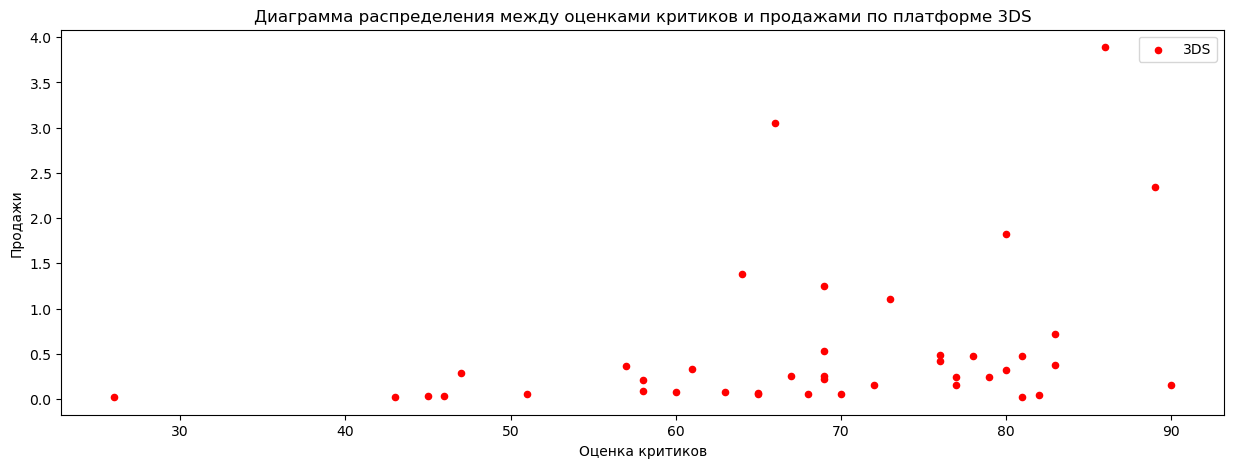

Коэффициент корреляции Пирсона между оценками пользователей и продажами по платформе XOne  = 0.47413765367287475


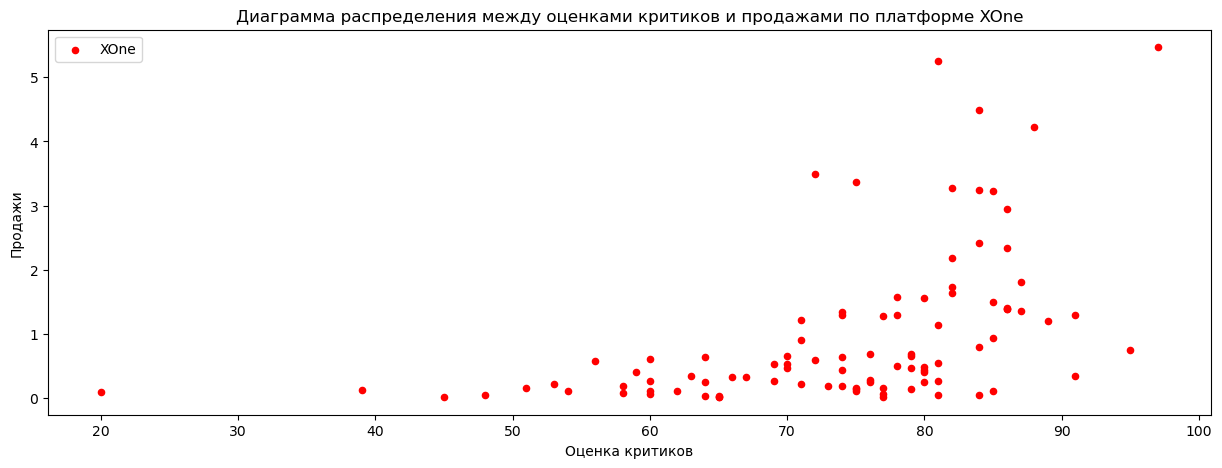

Коэффициент корреляции Пирсона между оценками пользователей и продажами по платформе PS4  = 0.4290034702738607


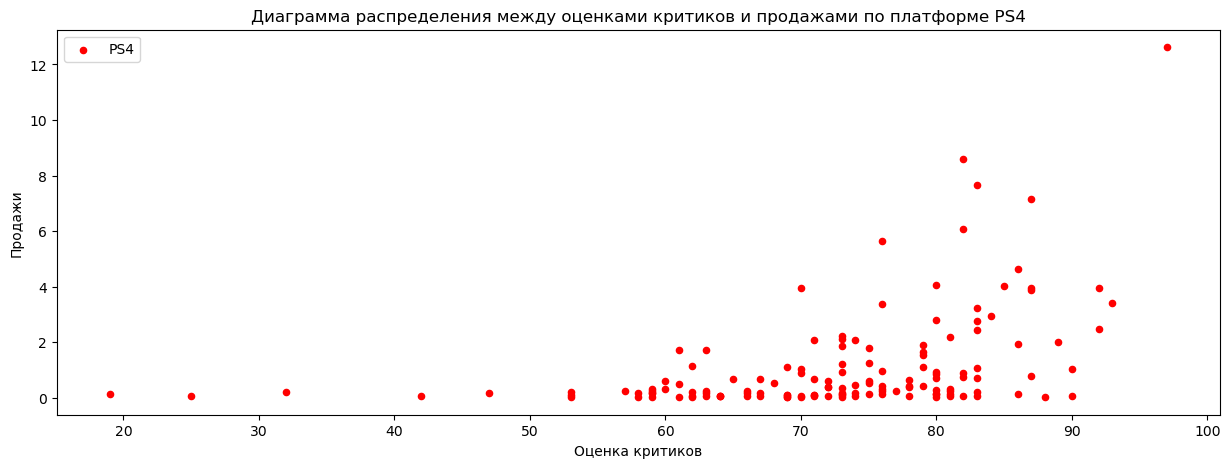

In [56]:
for name in top_3:
    (
    actual_period
        .query('platform == @name')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 5), 
          color='red')
    )
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Коэффициент корреляции Пирсона между оценками пользователей и продажами по платформе {name}  =', actual_period.query('platform == @name')['critic_score'].corr(actual_period.query('platform == @name')['total_sales']))
    plt.show()

Коэффициент корреляции оценки критиков от продаж колеблется от 0,3 до 0,4. Значит оценки критиков действительно влияют на продажи. Зависимость прямая.

<a id="develop_data9"></a>
#### Изучение влияния оценок пользователей и критиков на продажи игр по всем платформам

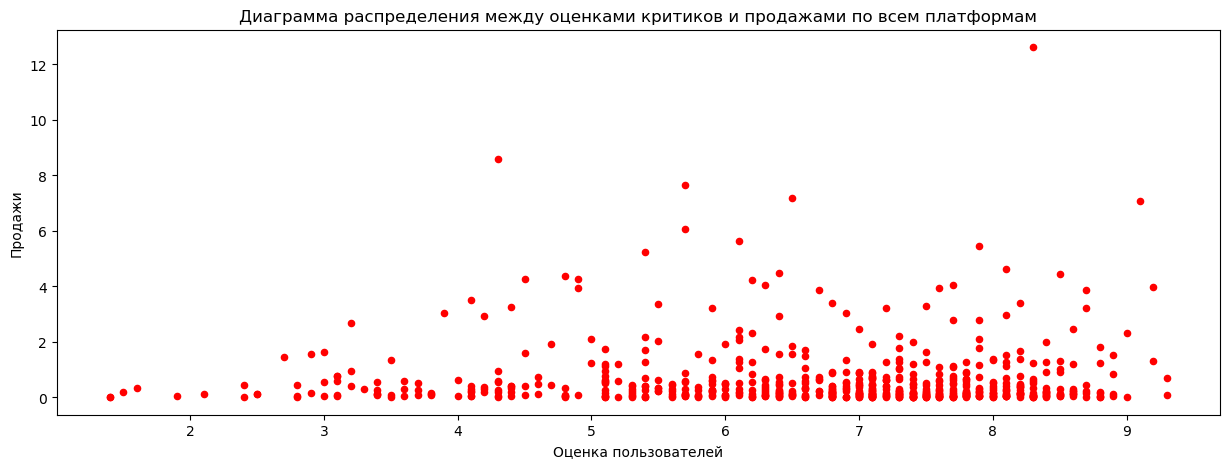

-0.0029174690915102033


In [57]:
(
actual_period
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 5), 
          color='red')
)
plt.title(f'Диаграмма распределения между оценками критиков и продажами по всем платформам')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()
print(actual_period['user_score'].corr(actual_period['total_sales']))

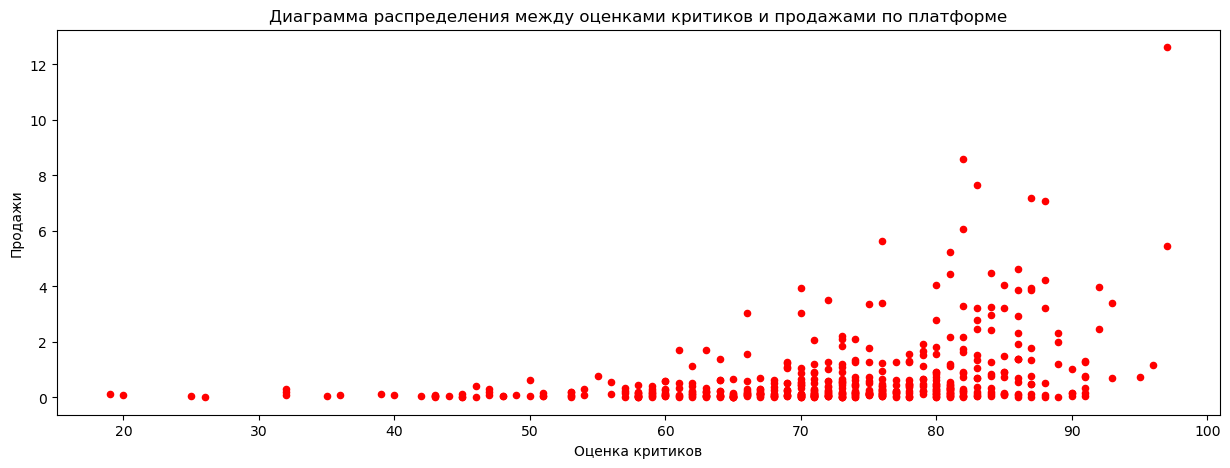

0.3543617033905393


In [58]:
(
actual_period
    .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(15, 5), 
          color='red')
)
plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()
print(actual_period['critic_score'].corr(actual_period['total_sales']))

Вывод: анализ показал, что оценки пользователей никак не влияют на породажи игр. В то же время оценки критиков действительно напрямую влияют на рост продаж. Пользователи ориентируются на оценки критиков и в зависимости от них делают свои предпочтения.

<a id="develop_data10"></a>
#### Анализ того, как жанр игры влияет на продажи игр

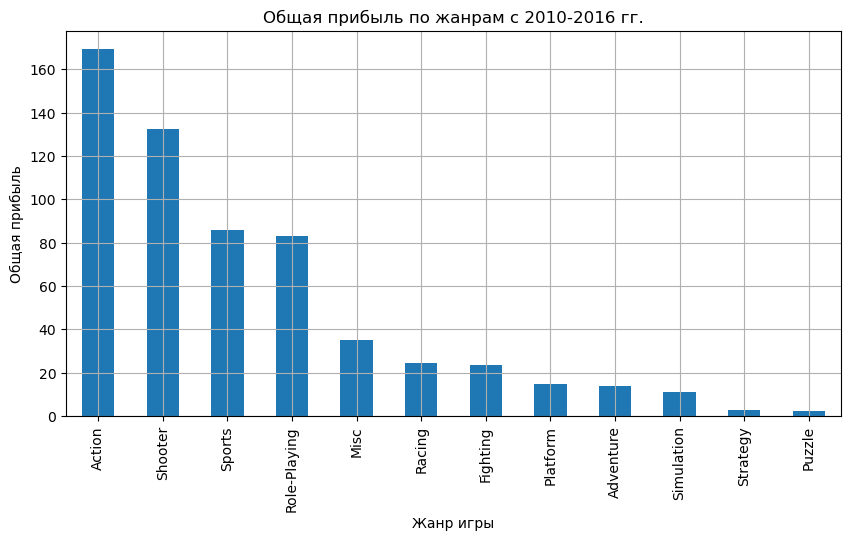

In [59]:
(actual_period
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False, grid=True, title = 'Общая прибыль по жанрам с 2010-2016 гг.')
 .set(xlabel='Жанр игры', ylabel='Общая прибыль'))

plt.show()

Самыми прибыльными жанрами являются Action, Shooter, Sports и Role-Playing.

Самые низкие продажи у жанров Puzzle, Strategy, Adventure и Fighting.

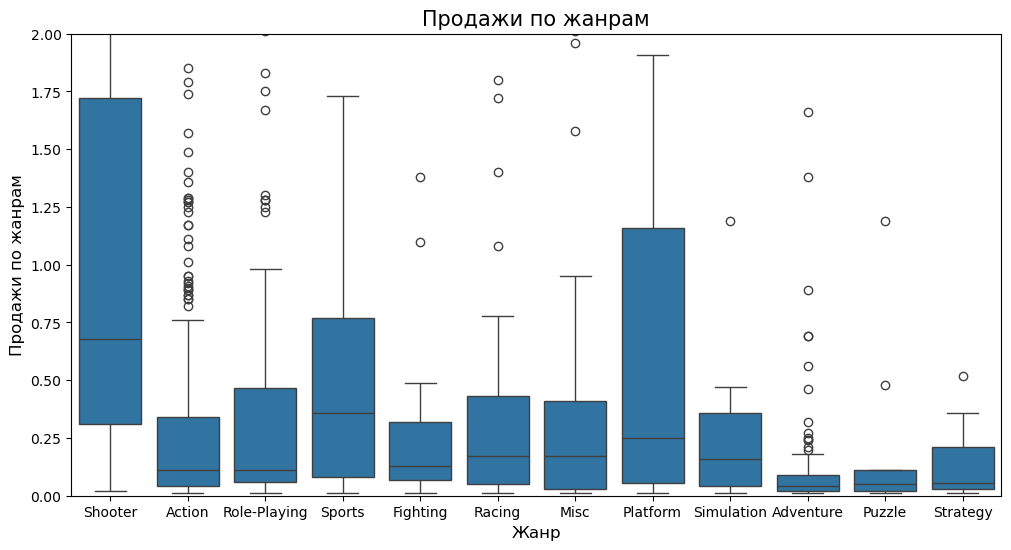

In [60]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_period, x='genre', y='total_sales')
ax.set(ylim=(0, 2))
plt.title('Продажи по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12);

Самое высокое медианное значение прибыли у жанра Shooter.

Вывод: Был определен жизненный цикл платформы - 6 лет. За актуальный период был взят период 2012-2015 гг. На данном актуальном периоде потенциально прибыльными платформами являются PS4 и XOne. Выявлено, что оценки пользователей практически не влияют на продажи игр. Оценки критиков влияют, но не в полной мере (коэффициент корреляции 0,3-0,4). Самыми прибыльными жанрами являются Action, Shooter, Sports и Role-Playing.

<a id="player"></a>
## Определение портрета игрока

<a id="player1"></a>
### Самые популярные платформы в зависимости от региона

In [61]:
# сводные таблицы по каждому региону

na = actual_period.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
eu = actual_period.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
jp = actual_period.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()

In [62]:
# фильтруем таблицы для создания категории other
other_na = na[:5]
other_eu = eu[:5]
other_jp = jp[:5]

In [63]:
# добавляем оставшиеся платформы в категорию other
other_na = pd.concat(
    [other_na, pd.DataFrame({'platform': 'Other', 'na_sales': [na['na_sales'].sum()-na['na_sales'][:5].sum()]})], ignore_index = True)
other_eu = pd.concat(
    [other_eu, pd.DataFrame({'platform': 'Other', 'eu_sales': [eu['eu_sales'].sum()-eu['eu_sales'][:5].sum()]})], ignore_index = True)
other_jp = pd.concat(
    [other_jp, pd.DataFrame({'platform': 'Other', 'jp_sales': [jp['jp_sales'].sum()-jp['jp_sales'][:5].sum()]})], ignore_index = True)

In [64]:
other_na

,platform,na_sales
0,PS4,77.12
1,XOne,67.00
2,X360,27.61
3,PS3,21.38
4,3DS,18.50
5,Other,27.52


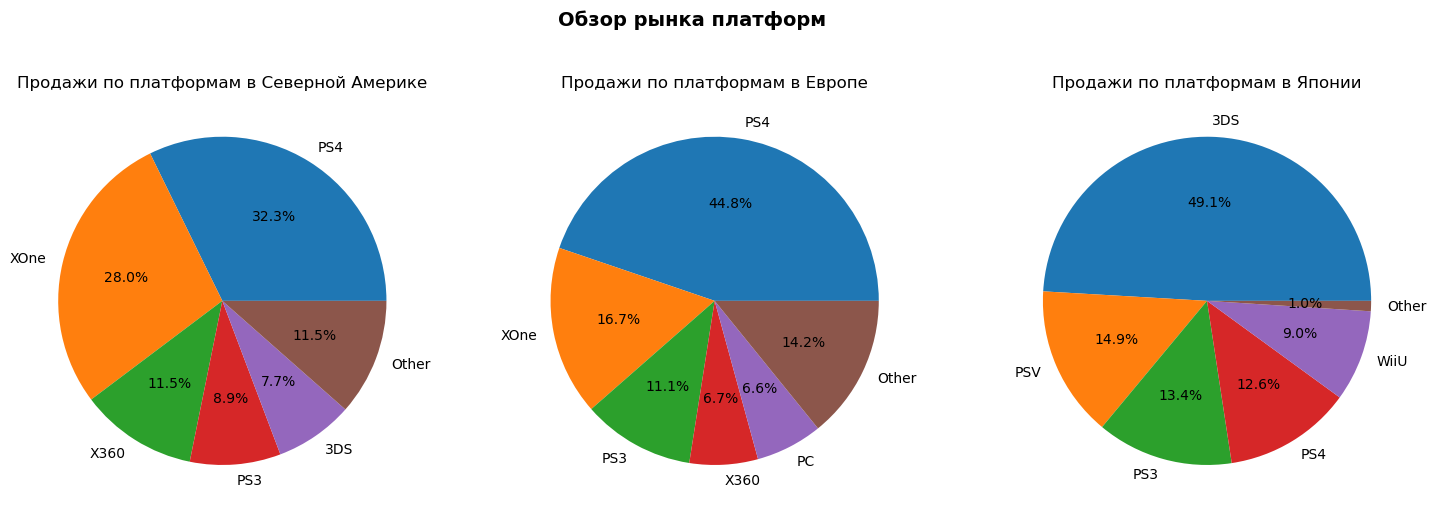

In [65]:
# строим круговые диаграммы
f, ax = plt.subplots(1, 3)
f.set_size_inches(18, 6)
f.suptitle('Обзор рынка платформ', fontsize=14, fontweight='bold');

plt.subplot(1, 3, 1)
vals=other_na['na_sales']
plt.pie(vals, labels=['PS4', 'XOne', 'X360', 'PS3', '3DS', 'Other'], autopct='%1.1f%%');
plt.title("Продажи по платформам в Северной Америке")

plt.subplot(1, 3, 2)
vals=other_eu['eu_sales']
plt.pie(vals, labels=['PS4', 'XOne', 'PS3', 'X360', 'PC', 'Other'], autopct='%1.1f%%');
plt.title("Продажи по платформам в Европе")

plt.subplot(1, 3, 3)
vals=other_jp['jp_sales']
plt.pie(vals, labels=['3DS', 'PSV', 'PS3', 'PS4', 'WiiU', 'Other'], autopct='%1.1f%%');
plt.title("Продажи по платформам в Японии")

plt.show()

Топ-5 популярных платформ в Северной Америке:
 - PS4
 - XOne 
 - X360
 - PS3
 - 3DS
 
 На первом месте PS4. На втором и третьем месте XOne и X360, разработка Microsoft. Всего в списке 2 платформы от Microsoft, 2 от SONY и 1 от Nintendo.

Топ-5 популярных платформ в Европе:
 - PS4
 - XOne
 - PS3
 - X360
 - PC
 
 На первом месте в рейтинге PS4 SONY, при этом есть большой отрыв от XOne Microsoft.

Топ-5 популярных платформ в Японии:
 - 3DS
 - PSV
 - PS3
 - PS4
 - WiiU
 
 В ТОПах в Японии только платформы местного производства. 3 платформы от SONY и 2 от Nintendo. Японские игроки поддерживают только отечественного производителя.

<a id="player2"></a>
### Самые популярные жанры в зависимости от региона

In [66]:
# сводные таблицы по каждому региону

genre_na = actual_period.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
genre_eu = actual_period.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
genre_jp = actual_period.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()

In [67]:
# фильтруем таблицы для создания категории other
other_genre_na = genre_na[:5]
other_genre_eu = genre_eu[:5]
other_genre_jp = genre_jp[:5]

In [68]:
# добавляем оставшиеся платформы в категорию other
other_genre_na = pd.concat(
    [other_genre_na, pd.DataFrame({'genre': 'Other', 'na_sales': [na['na_sales'].sum()-na['na_sales'][:5].sum()]})], ignore_index = True)
other_genre_eu = pd.concat(
    [other_genre_eu, pd.DataFrame({'genre': 'Other', 'eu_sales': [eu['eu_sales'].sum()-eu['eu_sales'][:5].sum()]})], ignore_index = True)
other_genre_jp = pd.concat(
    [other_genre_jp, pd.DataFrame({'genre': 'Other', 'jp_sales': [jp['jp_sales'].sum()-jp['jp_sales'][:5].sum()]})], ignore_index = True)

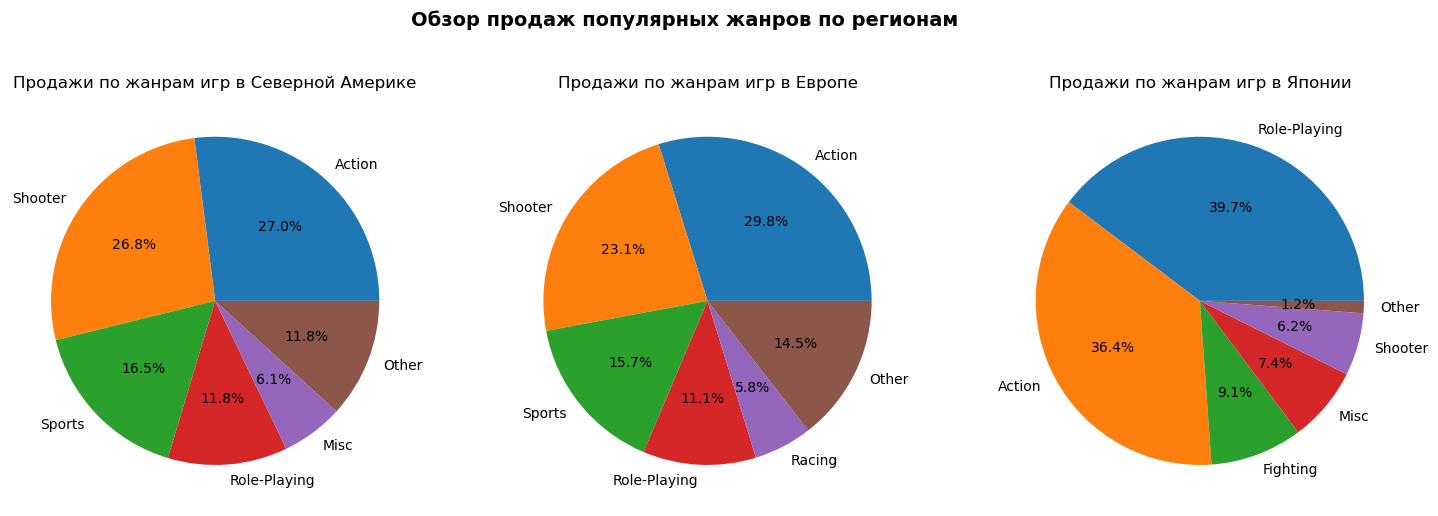

In [69]:
# строим круговые диаграммы
f, ax = plt.subplots(1, 3)
f.set_size_inches(18, 6)
f.suptitle('Обзор продаж популярных жанров по регионам', fontsize=14, fontweight='bold');

plt.subplot(1, 3, 1)
vals=other_genre_na['na_sales']
plt.pie(vals, labels=['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Other'], autopct='%1.1f%%');
plt.title("Продажи по жанрам игр в Северной Америке")

plt.subplot(1, 3, 2)
vals=other_genre_eu['eu_sales']
plt.pie(vals, labels=['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing', 'Other'], autopct='%1.1f%%');
plt.title("Продажи по жанрам игр в Европе")

plt.subplot(1, 3, 3)
vals=other_genre_jp['jp_sales']
plt.pie(vals, labels=['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter', 'Other'], autopct='%1.1f%%');
plt.title("Продажи по жанрам игр в Японии")

plt.show()

Топ-5 популярных игр в Северной Америке:
 - Action
 - Shooter
 - Sports
 - Role-playing
 - Misc
 
Хороший выбор.

Топ-5 популярных платформ в Европе:
 - Action
 - Shooter
 - Sports
 - Role-playing
 - Racing
 
Игровые вкусы американцев и европейцев практически одинаковые.

Топ-5 популярных игр в Японии:
 - Role-playing
 - Action
 - Fighting
 - Misc
 - Shooter
 
Игровые вкусы японских пользователей отличаются от западных игроков.

<a id="player3"></a>
### Влияние рейтинга ESRB на продажи в отдельном регионе

Рейтинг ESRB имеет следующие категории:
 - «EC» («Early childhood») — «Для детей младшего возраста»
 - «E» («Everyone») — «Для всех»
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «T» («Teen») — «Подросткам»
 - «M» («Mature») — «Для взрослых»
 - «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [70]:
na_region = actual_period[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'rating']]
eu_region = actual_period[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'rating']]
jp_region = actual_period[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'rating']]

In [71]:
na_region['rating'].unique()

array(['no_rating', 'M', 'E', 'T', 'E10+'], dtype=object)

In [72]:
eu_region['rating'].unique()

array(['no_rating', 'M', 'E', 'T', 'E10+'], dtype=object)

In [73]:
jp_region['rating'].unique()

array(['no_rating', 'M', 'E', 'T', 'E10+'], dtype=object)

Во всех выборка присутствуют пустые значения и рейтинг RP. Убираем эти значения.

In [74]:
na_region_esrb = na_region[(na_region['rating'] != 'RP') & (na_region['rating'] != 'no_rating')]
eu_region_esrb = eu_region[(eu_region['rating'] != 'RP') & (eu_region['rating'] != 'no_rating')]
jp_region_esrb = jp_region[(jp_region['rating'] != 'RP') & (jp_region['rating'] != 'no_rating')]

In [75]:
# сводные таблицы по каждому региону

esrb_na = na_region_esrb.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
esrb_eu = eu_region_esrb.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
esrb_jp = jp_region_esrb.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()

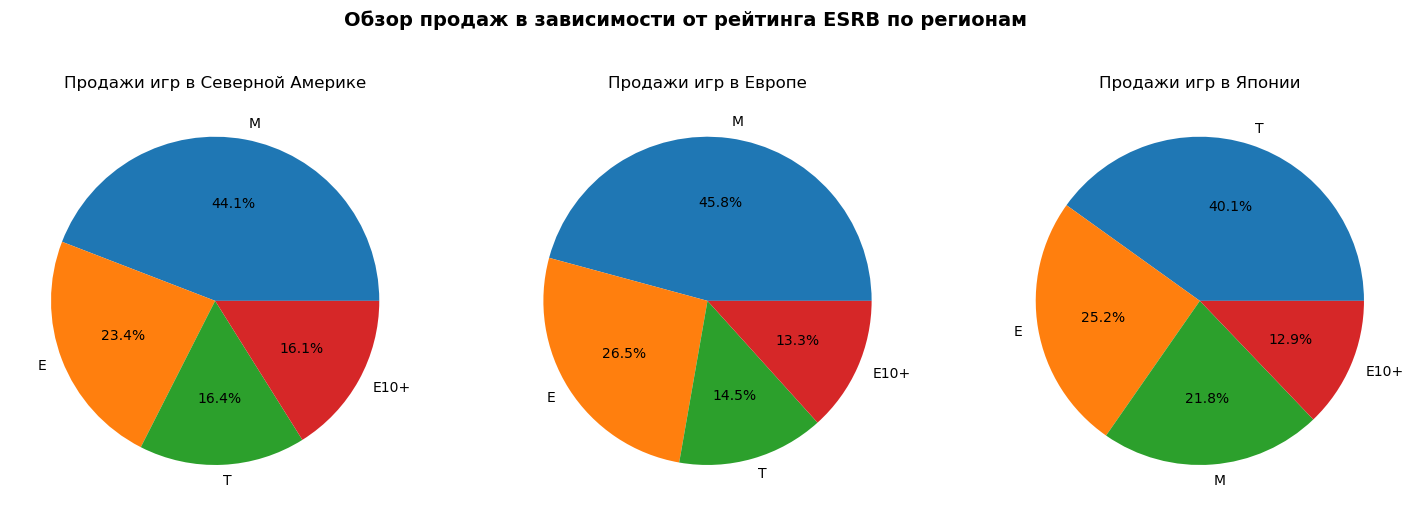

In [76]:
# строим круговые диаграммы
f, ax = plt.subplots(1, 3)
f.set_size_inches(18, 6)
f.suptitle('Обзор продаж в зависимости от рейтинга ESRB по регионам', fontsize=14, fontweight='bold');

plt.subplot(1, 3, 1)
vals=esrb_na['na_sales']
plt.pie(vals, labels=['M', 'E', 'T', 'E10+'], autopct='%1.1f%%');
plt.title("Продажи игр в Северной Америке")

plt.subplot(1, 3, 2)
vals=esrb_eu['eu_sales']
plt.pie(vals, labels=['M', 'E', 'T', 'E10+'], autopct='%1.1f%%');
plt.title("Продажи игр в Европе")

plt.subplot(1, 3, 3)
vals=esrb_jp['jp_sales']
plt.pie(vals, labels=['T', 'E', 'M', 'E10+'], autopct='%1.1f%%');
plt.title("Продажи игр в Японии")

plt.show()

ТОП-продаж по рейтингу ESRB в Северной Америке:
 - «M» («Mature») — «Для взрослых»
 - «E» («Everyone») — «Для всех»
 - «T» («Teen») — «Подросткам»
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

ТОП-продаж по рейтингу ESRB в Европе:
 - «M» («Mature») — «Для взрослых»
 - «E» («Everyone») — «Для всех»
 - «T» («Teen») — «Подросткам»
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

ТОП-продаж по рейтингу ESRB в Японии:
 - «T» («Teen») — «Подросткам»
 - «E» («Everyone») — «Для всех»
 - «M» («Mature») — «Для взрослых»
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

<a id="check_hypot"></a>
## Проверка гипотез

<a id="check_hypot1"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотезы:

    Н0: Средние пользовательские рейтинги платформ XOne и PC равны
    Н1: Средние пользовательские рейтинги платформ XOne и PC не равны

In [77]:
xone = actual_period.query('platform == "XOne" and user_score.notna()')
pc = actual_period.query('platform == "PC" and user_score.notna() and year_of_release !=2012')

In [78]:
# check
display(xone['year_of_release'].unique())
display(pc['year_of_release'].unique())

array([2014, 2015], dtype=int64)

array([2014, 2015], dtype=int64)

In [79]:
xone['user_score'].describe()

count    99.000000
mean      6.591919
std       1.263351
min       2.100000
25%       5.800000
50%       6.800000
75%       7.500000
max       9.200000
Name: user_score, dtype: float64

In [80]:
pc['user_score'].describe()

count    77.000000
mean      6.298701
std       1.692980
min       1.400000
25%       5.400000
50%       6.800000
75%       7.600000
max       9.300000
Name: user_score, dtype: float64

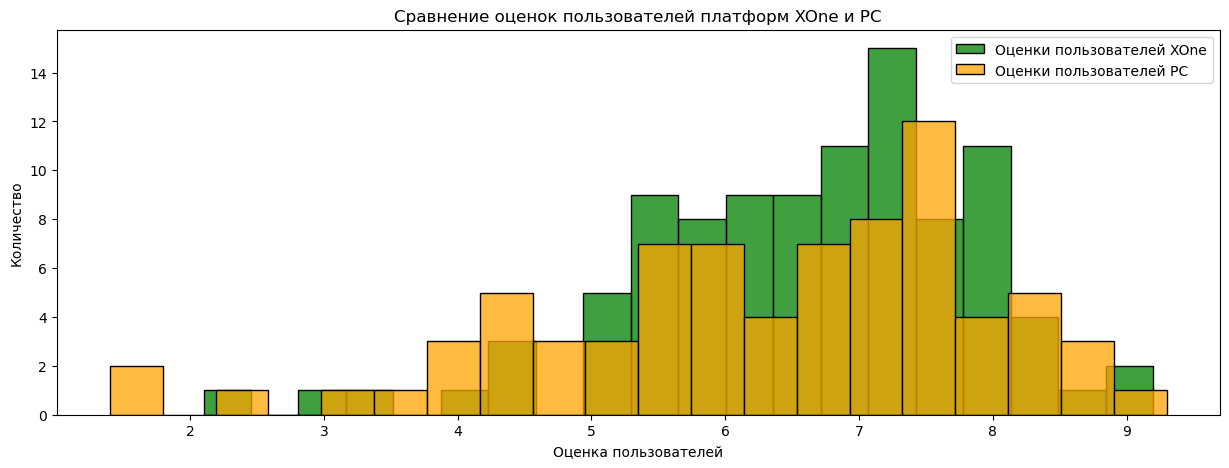

In [81]:
fig, axs = plt.subplots(figsize=(15, 5))

sns.histplot(data=xone, x="user_score", bins=20, color="green")
sns.histplot(data=pc, x="user_score", bins=20, color="orange")
plt.xlabel("Оценка пользователей")
plt.ylabel("Количество")
plt.title("Сравнение оценок пользователей платформ XOne и PC")
plt.legend (('Оценки пользователей XOne', 'Оценки пользователей PC'))
plt.show()

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей с помощью метода scipy.stats.ttest_ind(array1, array2, equal_var, alternative).
Выбран метод scipy.stats.ttest_ind, так как две генеральные совокупности не зависят друг от друга.
Выборочные средние нормально распределены и дисперсии рассматриваемых генеральных совокупностей равны.

In [82]:
alpha = 0.05

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=True, alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.18996732166069102
Не получилось отвергнуть нулевую гипотезу


Вывод: Отвергнуть нулевую гипотезу не получается, а значит средние пользовательские рейтинги платформ XOne и PC близки к равным.

<a id="check_hypot2"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные

Гипотезы:

    Н0: Средние пользовательские рейтинги жанров Action и Sports равны
    Н1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [83]:
genre_action = actual_period.query('genre == "Action" and user_score.notna()')
genre_sports = actual_period.query('genre == "Sports" and user_score.notna()')

In [84]:
genre_action['user_score'].describe()

count    212.000000
mean       6.809434
std        1.338637
min        2.400000
25%        6.300000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [85]:
genre_sports['user_score'].describe()

count    90.000000
mean      5.140000
std       1.780595
min       1.400000
25%       3.650000
50%       5.400000
75%       6.375000
max       8.800000
Name: user_score, dtype: float64

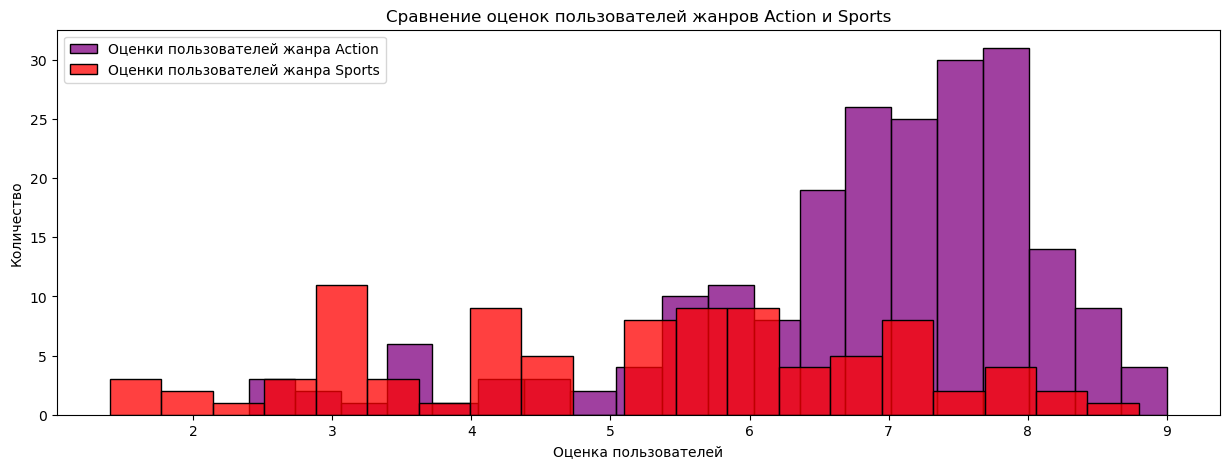

In [86]:
fig, axs = plt.subplots(figsize=(15, 5))

sns.histplot(data=genre_action, x="user_score", bins=20, color="purple")
sns.histplot(data=genre_sports, x="user_score", bins=20, color="red")
plt.xlabel("Оценка пользователей")
plt.ylabel("Количество")
plt.title("Сравнение оценок пользователей жанров Action и Sports")
plt.legend (('Оценки пользователей жанра Action', 'Оценки пользователей жанра Sports'))
plt.show()

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей с помощью метода scipy.stats.ttest_ind(array1, array2, equal_var, alternative).
Выбран метод scipy.stats.ttest_ind, так как две генеральные совокупности не зависят дург от друга.
Выборочные средние нормально распределены и дисперсии рассматриваемых генеральных совокупностей не равны.

In [87]:
alpha = 0.05

results = st.ttest_ind(genre_action['user_score'], genre_sports['user_score'], equal_var=False, alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.639159825656943e-13
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась, а значит средние пользовательские рейтинги жанров Action и Sports с высокой вероятностью не равны.

<a id="vivod"></a>
## Заключение

В результате данного проекта был проведен анализ продаж игр по платформам и жанрам c 1980 по 2016 гг.

**Предобработка данных:**
 - изменен тип данных в столбцах **year_of_release** и **user_score** на int64 и float64 соответственно;
 - удалены пропуски в столбцах **name**, **year_of_release** и **genre**, так как их было немного;
 - пропуски в столбцах **critic_score**, **user_score**,  **rating** не удалялись, так как их много и они могут исказить данные.

**Исследовательский анализ данных:**
 - за весь период наблюдения были выделены платформы с наибольшими продажами: PS, DS, Wii, PS3, X360, PS2.
 - вычислен жизненный цикл платформы, медианное значение составило 6 лет;
 - в качестве актуального периода анализа был выбран период с 2012-2015 гг.;
 - в результате анализа  были выявлены следующие лидеры по продажам платформы за период 2012-2015 гг.: PS3, PS4, X360, 3DS, XOne.
 - потенциально прибыльные платформы на момент 2015 г. - PS4 и XOne;
 - было выявлено, что пользовательские оценки не влияют на продажи игр;
 - оценки критиков наоборот увеличивают продажи игр, пользователи ориентируются на оценки критиков при покупке игр;
 - самые прибыльные жанры игр: Action, Shooter, Sports и Role-Playing.
 
**Анализ продаж в зависимости от региона, жанра и рейтинга ESRB:**
1.	Топ-5 популярных платформ в Северной Америке:
  -	X360
  -	PS3
  -	Wii
  -	PS4
  -	XOne
  
  
2.	Топ-5 популярных платформ в Европе:
  -	PS3
  -	X360
  -	PS4
  -	PC
  -	Wii
  
  
3.	Топ-5 популярных платформ в Японии:
  -	3DS
  -	PS3
  -	PSP
  -	DS
  -	PSV


4.	Топ-5 популярных игр в Северной Америке и Европе идентичные:
  -	Action
  -	Shooter
  -	Sports
  -	Misc
  -	Role-playing


5.	В Японии игровые вкусы отличаются. Их  Топ-5 популярных игр следующий:
  -	Role-playing
  -	Action
  -	Misc
  -	Platform
  -	Adventure


6.	ТОП-продаж по рейтингу ESRB в Северной Америке и Европе идентичные:
  -	«M» («Mature») — «Для взрослых»
  -	«E» («Everyone») — «Для всех»
  -	«T» («Teen») — «Подросткам»
  -	«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».


7.	ТОП-продаж по рейтингу ESRB в Японии:
  -	«E» («Everyone») — «Для всех»
  -	«T» («Teen») — «Подросткам»
  -	«M» («Mature») — «Для взрослых»
  -	«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

**Проверка гипотез**

В результате проверки гипотез были сделаны следующие выводы:
1.	Средние пользовательские рейтинги платформ XOne и PC близки к равным.
2.	Средние пользовательские рейтинги жанров Action и Sports с высокой долей вероятности не равны.

**Общий вывод**:

На момент 2015 г. потенциально прибыльными платформами являются PS4 и XOne, так как их продажи растут.